In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

**(1)** By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of `name_distribution`and fill out the bracket with your choice again. Then please, 

**(a)** Draw the histogram and interpret

In [2]:
np.random.seed(42)
distribution = np.random.normal(100, 50, 500)

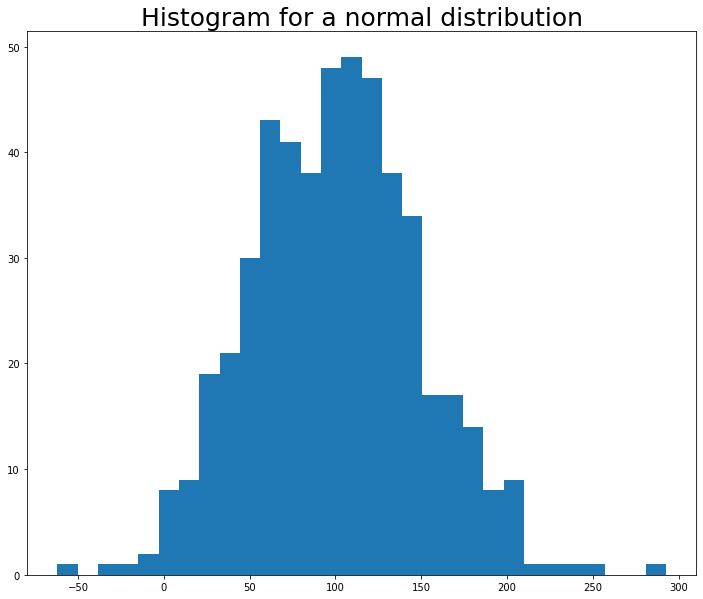

In [3]:
plt.figure(figsize=(12, 10))
plt.hist(distribution, bins=30)
plt.title('Histogram for a normal distribution', fontsize=25)
plt.show()

### Interpretation
This plot shows a histogram of 500 values drawn from a normal distribution with a mean of 100 and a standard deviation of 50. \
About 99.7% of the values will be between +3/-3 standard deviations around the mean, which means that they will be between -50 and 250. However, it can be seen from the histogram that there are some outliers that are exceeding these limits.

**(b)** Draw Q-Q plot and interpret

In [4]:
normal_distribution = np.random.normal(np.mean(distribution), np.std(distribution), 500)

In [5]:
distribution.sort()
normal_distribution.sort()

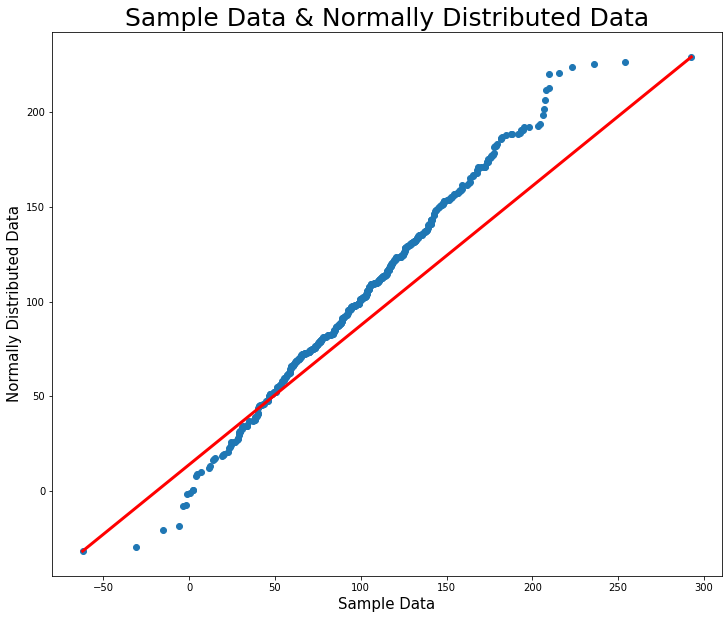

In [6]:
# Plotting with Matplotlib

plt.figure(figsize=(12, 10))
plt.title('Sample Data & Normally Distributed Data', fontsize=25)
plt.xlabel('Sample Data', fontsize=15)
plt.ylabel('Normally Distributed Data', fontsize=15)
plt.scatter(distribution, normal_distribution)
plt.plot([np.min(distribution), np.max(distribution)],
         [np.min(normal_distribution), np.max(normal_distribution)], c='red', linewidth=3)
plt.show()

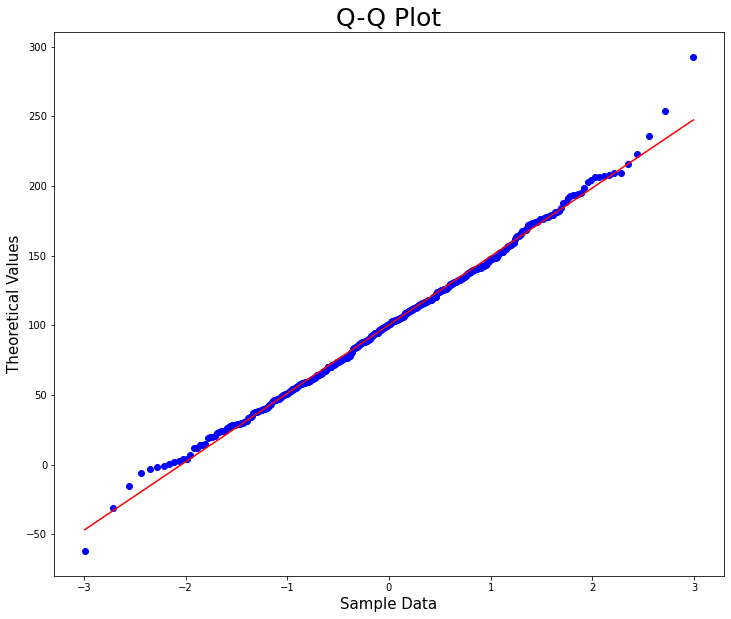

In [7]:
# Plotting with stats.problot

plt.figure(figsize=(12, 10))
nsample = 100
res = stats.probplot(distribution, plot=plt)
plt.title("Q-Q Plot", fontsize=25)
plt.xlabel("Sample Data", fontsize=15)
plt.ylabel("Theoretical Values", fontsize=15)
plt.show()

### Interpretation

Since the plotted data looks far from the straight red line in the middle in most of the data, we can say that our sample data is not close to a normal distribution.

**(2)** Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

In [8]:
facebook = pd.read_csv('FB.csv')
facebook.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [9]:
try:
  for i in range(len(facebook)):
    facebook.loc[i, 'price_return'] = (facebook.loc[i+1, 'Volume'] - facebook.loc[i, 'Volume'])/facebook.loc[i, 'Volume']
except:
  pass

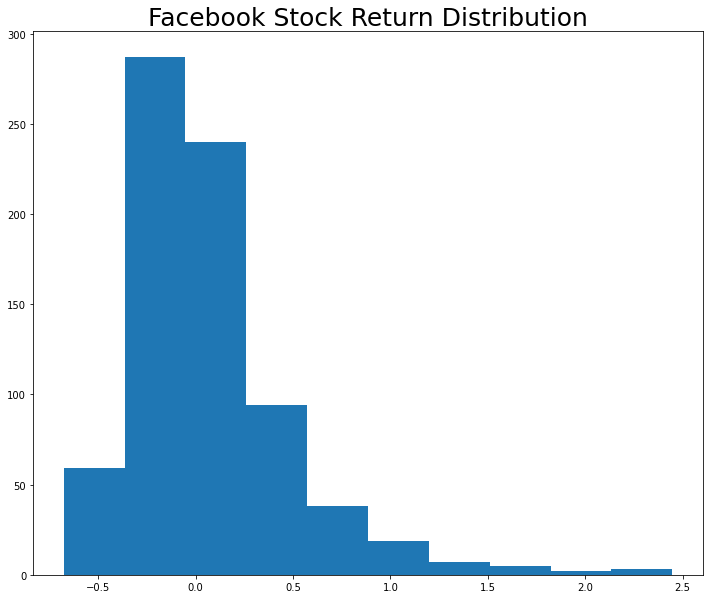

In [10]:
plt.figure(figsize=(12, 10))

plt.title('Facebook Stock Return Distribution', fontsize=25)
plt.hist(facebook['price_return'].dropna())
plt.show()

The return distribution is right-skewed.